In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from skimage import data, color, feature
from skimage.feature import hog
import glob

In [ ]:
def load_data(coin, category):
    label = arr = []
    path = "/content/drive/MyDrive/Sample_Data/" + coin + "/" + category + "/*"
    for file_ in glob.glob(path):
      img = cv2.imread(file_)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      arr.append(img)
      label.append(coin)
    return arr, label

In [ ]:
def assign_data(mode):
    
  bishop_data, bishop_label = load_data('Bishop', mode)
  king_data, king_label = load_data('King', mode)
  pawn_data, pawn_label = load_data('Pawn', mode)
  queen_data, queen_label = load_data('Queen', mode)
  rook_data, rook_label = load_data('Rook', mode)
  knight_data, knight_label = load_data('Knight', mode)
    
  data = np.concatenate((bishop_data, king_data, pawn_data, queen_data, rook_data, knight_data))
  labels = np.concatenate((bishop_label, king_label, pawn_label, queen_label, rook_label, knight_label))
  return data, labels

In [ ]:
data_train, labels_train = assign_data('Train')
data_test, labels_test = assign_data('Test')

In [ ]:
data_train.shape, labels_train.shape

((150, 224, 224, 3), (150,))

In [ ]:
def preprocessing(arr):
    arr_prep = []
    for i in range(arr.shape[0]):
        img = cv2.cvtColor(arr[i], cv2.COLOR_BGR2GRAY)
        img = resize(img, (72, 72), anti_aliasing = True)
        arr_prep.append(img)
    return arr_prep

In [ ]:
data_train1 = preprocessing(data_train)
data_test1 = preprocessing(data_test)

In [ ]:
type(data_train[0])

numpy.ndarray

In [ ]:
def extractHOG(img):
    ftr, tmp = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=False)
    return ftr
  
def preprocess(arr):
    return [extractHOG(arr[i]) for i in range(np.shape(arr)[0])]

In [ ]:
data_train_ftr = preprocess(data_train1)
data_test_ftr = preprocess(data_test1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=11)
knn_clf.fit(data_train_ftr, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=11, p=2,
                     weights='distance')

In [ ]:
train_score = accuracy_score(labels_train, knn_clf.predict(data_train_ftr))
test_score = accuracy_score(labels_test, knn_clf.predict(data_test_ftr))
print("KNN Train score = ", str(train_score * 100)[:5] + " %")
print("KNN Test score = ", str(test_score * 100)[:5] + " %")

KNN Train score =  100.0 %
KNN Test score =  82.97 %


In [ ]:
def showImg(img, name):
    plt.axis("off")
    plt.title("Test Image ", y = 0.95, fontsize = 14)
    plt.text(0.10,0.05,"Ouput Predicted = {}".format(name), bbox = {'facecolor':'w','pad':5}, ha = "left", va = "top", transform = plt.gca().transAxes, fontsize = 12 )
    plt.imshow(img)
    plt.show()

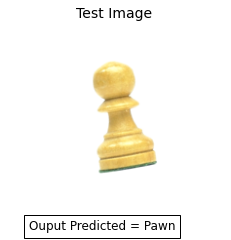

In [ ]:
from random import seed
from random import randint
n = randint(0, data_test.shape[0])
showImg(data_test[n], knn_clf.predict(data_test_ftr)[n])